In [0]:
import numpy

In [0]:
from keras.datasets import mnist #loading the mnist dataset, of text images

In [0]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [54]:
test_images.ndim

3

In [55]:
train_images.dtype

dtype('uint8')

So, it is a 3d tensor having 60,000 images with 28x28 resolution. It's a greyscale image, with coeffieiect betweem 0 to 255

In [0]:
#to display any image from this tensor
import matplotlib.pyplot as plt
digit=train_images[5]

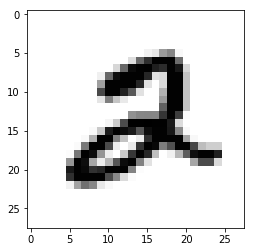

In [57]:
plt.imshow(digit,cmap=plt.cm.binary)
#converting into greyscale using plt.cm.binary

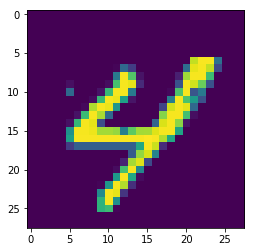

In [58]:
plt.imshow(train_images[89]) #without greyscale image

In [0]:
from keras import models
from keras import layers
#Creating our neural network

In [0]:
#building the model
network=models.Sequential()
# A Sqequential API allows you to create models layer by layer
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

In [0]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
#rnsprop is a gradient based opitimation technique to deal with the problem
#categorical_crossentropy is a technique used to calculate the loss of the network
#it is used when you have single label
#metric is use to judge the performance of the model
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

In [0]:
#@title Default title text
from keras.utils import to_categorical
#converts class vectors(intergers) to binary class matrix

In [0]:
#example of TO_CATEGORICAL
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
# > labels
# array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many
# columns as there are classes. The number of rows
# stays the same.
# > to_categorical(labels)
# array([[ 1.,  0.,  0.],
   #     [ 0.,  0.,  1.],
   #     [ 0.,  1.,  0.],
    #    [ 0.,  0.,  1.],
     #   [ 1.,  0.,  0.]], dtype=float32)

In [0]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [64]:
#now it is time to train the network
#fitting the model to it's training data
network.fit(train_images,train_labels,epochs=5,batch_size=128)
#epochs means how many times you want to run your network

Epoch 1/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.2548 - acc: 0.9268
Epoch 2/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.1032 - acc: 0.9697
Epoch 3/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.0689 - acc: 0.9793
Epoch 4/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0501 - acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.0369 - acc: 0.9885


In [65]:
#now time to test the model
test_loss,test_acc=network.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 51us/step


In [66]:
test_loss

0.07007258786489255

In [67]:
test_acc

0.9786